<a href="https://colab.research.google.com/github/GOVINDFROMINDIA/Skymet-Version-Control/blob/main/ExistingBias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading & Initial Statistics

In [ ]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
import pandas as pd
data_path = '/content/drive/MyDrive/skymet/ML_merge_Data.xlsx'
df = pd.read_excel(data_path)

print("First 5 elements:")
print(df.head())

print("\nLast 5 elements:")
print(df.tail())

num_rows, num_columns = df.shape
print(f"\nNumber of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

print("\nColumn names:")
print(df.columns.tolist())


First 5 elements:
             ID  AREA_ID        Device ID            Timestamp       Date  \
0  1.440750e+06        1  862649044418623  01-09-2020 07:00:00 2020-09-01   
1  1.440750e+06        1  862649044418623  01-09-2020 08:00:00 2020-09-01   
2  1.440750e+06        1  862649044418623  01-09-2020 09:00:00 2020-09-01   
3  1.440750e+06        1  862649044418623  01-09-2020 10:00:00 2020-09-01   
4  1.440750e+06        1  862649044418623  01-09-2020 11:00:00 2020-09-01   

       Time  Ambient Temperature(Deg.C)  Ambient Humidity(%)  \
0  07:00:00                        22.0                 99.9   
1  08:00:00                        23.0                 99.9   
2  09:00:00                        24.8                 92.4   
3  10:00:00                        27.0                 83.2   
4  11:00:00                        30.3                 71.9   

   Precipitation(mm/hour)  TEMP_FCST  RH(%)  Rain_FCST  Surf_Pres.hPa.  \
0                     0.0      22.56  94.97       0.38      

In [ ]:
columns_to_consider = ['Timestamp', 'Ambient Temperature(Deg.C)', 'Ambient Humidity(%)', 'Precipitation(mm/hour)',
                        'TEMP_FCST', 'RH(%)', 'Rain_FCST', 'Surf_Pres.hPa.', 'TEMP.degC.', 'Rain.mm.', 'u10.m.s.',
                        'v10.m.s.', 'sh.kg.kg.', 'low_cloud...', 'hgt.m.']

df = df[columns_to_consider]
df = df.dropna(subset=columns_to_consider)

print(df)
num_rows, num_columns = df.shape
print(f"\nNumber of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

                  Timestamp  Ambient Temperature(Deg.C)  Ambient Humidity(%)  \
0       01-09-2020 07:00:00                        22.0                 99.9   
1       01-09-2020 08:00:00                        23.0                 99.9   
2       01-09-2020 09:00:00                        24.8                 92.4   
3       01-09-2020 10:00:00                        27.0                 83.2   
4       01-09-2020 11:00:00                        30.3                 71.9   
...                     ...                         ...                  ...   
294754  23-05-2023 12:00:00                        33.5                 63.9   
294755  23-05-2023 13:00:00                        34.2                 63.8   
294756  23-05-2023 14:00:00                        34.2                 63.8   
294757  23-05-2023 15:00:00                        34.2                 63.8   
294758  23-05-2023 16:00:00                        34.2                 63.8   

        Precipitation(mm/hour)  TEMP_FC

# Feature Engineering

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Unix_Timestamp'] = df['Timestamp'].apply(lambda x: int(x.timestamp()))
print(df)
num_rows, num_columns = df.shape

                 Timestamp  Ambient Temperature(Deg.C)  Ambient Humidity(%)  \
0      2020-01-09 07:00:00                        22.0                 99.9   
1      2020-01-09 08:00:00                        23.0                 99.9   
2      2020-01-09 09:00:00                        24.8                 92.4   
3      2020-01-09 10:00:00                        27.0                 83.2   
4      2020-01-09 11:00:00                        30.3                 71.9   
...                    ...                         ...                  ...   
294754 2023-05-23 12:00:00                        33.5                 63.9   
294755 2023-05-23 13:00:00                        34.2                 63.8   
294756 2023-05-23 14:00:00                        34.2                 63.8   
294757 2023-05-23 15:00:00                        34.2                 63.8   
294758 2023-05-23 16:00:00                        34.2                 63.8   

        Precipitation(mm/hour)  TEMP_FCST  RH(%)  R

In [ ]:
print("\nColumn names:")
print(df.columns.tolist())


Column names:
['Timestamp', 'Ambient Temperature(Deg.C)', 'Ambient Humidity(%)', 'Precipitation(mm/hour)', 'TEMP_FCST', 'RH(%)', 'Rain_FCST', 'Surf_Pres.hPa.', 'TEMP.degC.', 'Rain.mm.', 'u10.m.s.', 'v10.m.s.', 'sh.kg.kg.', 'low_cloud...', 'hgt.m.', 'Unix_Timestamp']


In [ ]:
df.to_csv('/content/drive/MyDrive/skymet/data.csv', index=False)

In [ ]:
import pandas as pd

df['Unix_Timestamp'] = pd.to_datetime(df['Unix_Timestamp'], unit='s')

time_diff = df['Unix_Timestamp'].diff()
unique_time_diff = time_diff.unique()
print(f"Unique Time Differences:\n{unique_time_diff}")
mode_time_diff = time_diff.mode().iloc[0]
print(f"Most Common Time Difference (Mode): {mode_time_diff}")


Unique Time Differences:
[              'NaT'       3600000000000    2646000000000000
    2422800000000000    2602800000000000       7200000000000
    2509200000000000    2595600000000000    2552400000000000
   -7599600000000000      10800000000000      14400000000000
  -22892400000000000    2516400000000000   -5094000000000000
      -3600000000000  -25477200000000000    2430000000000000
     655200000000000  -27982800000000000    2336400000000000
  -27896400000000000   -2588400000000000    2343600000000000
    2512800000000000  -25311600000000000   -4921200000000000
  -22978800000000000   -7513200000000000    2599200000000000
  -20386800000000000      28800000000000  -10018800000000000
    2340000000000000  -17881200000000000                   0
  -12610800000000000  -15289200000000000  -15116400000000000
  -12783600000000000     136800000000000      61200000000000
      39600000000000      50400000000000      43200000000000
      57600000000000      18000000000000  -17661600000000000

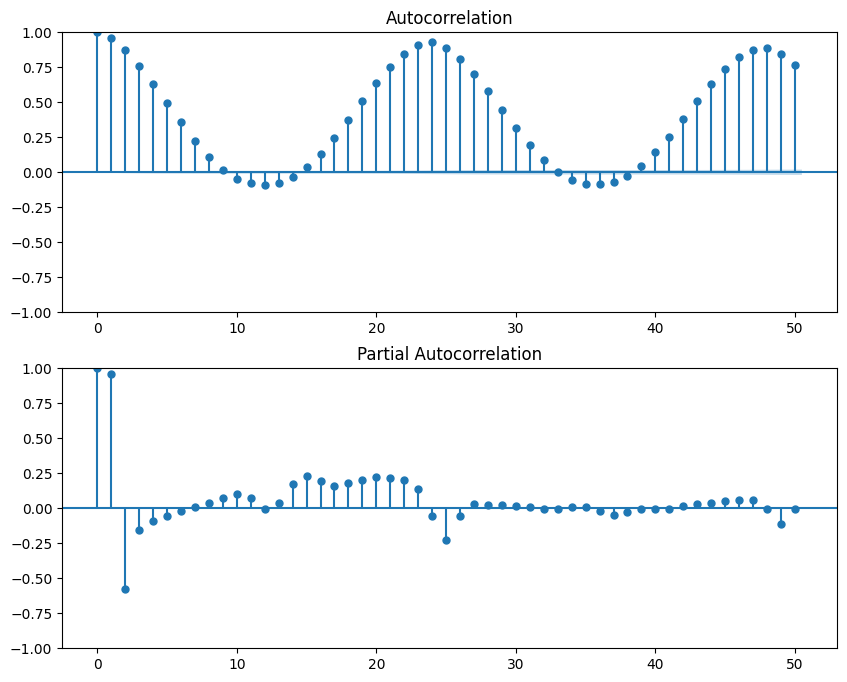

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(df['Ambient Temperature(Deg.C)'], ax=ax1, lags=50)
plot_pacf(df['Ambient Temperature(Deg.C)'], ax=ax2, lags=50)
plt.show()
